In [1]:
#THIS IS MY NEW AND IMPROVED DATAFRAME, CALLED data.  AFTER READING IN AND EXPLORING A BIT, 
#MY ANALYSIS STARTS WITH CLEANING E.G. CHANGING DATA TYPES AND TRANSFORMING E.G. ADDING IN NEW COLUMNS

import pandas as pd
from pandas import Series, DataFrame
from pylab import *
import matplotlib.pyplot as pt
%matplotlib inline
from datetime import datetime, date, time


In [2]:
data = pd.read_csv('C:/Users/User/Documents/Data Science Course Materials/ks-projects-201801.csv',index_col='ID', 
                        encoding='utf-8', sep=",")


In [3]:
data.head()

,name,category,main_category,currency,deadline,goal,launched,pledged,state,backers,country,usd_pledged,usd_pledged_real,usd_goal_real
ID,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,10/9/2015,1000.0,8/11/2015 12:12,0.0,failed,0,GB,0.0,0.0,1533.95
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,11/1/2017,30000.0,9/2/2017 4:43,2421.0,failed,15,US,100.0,2421.0,30000.00
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2/26/2013,45000.0,1/12/2013 0:20,220.0,failed,3,US,220.0,220.0,45000.00
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,4/16/2012,5000.0,3/17/2012 3:24,1.0,failed,1,US,1.0,1.0,5000.00
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,8/29/2015,19500.0,7/4/2015 8:35,1283.0,canceled,14,US,1283.0,1283.0,19500.00


In [4]:
data.dtypes

name                 object
category             object
main_category        object
currency             object
deadline             object
goal                float64
launched             object
pledged             float64
state                object
backers               int64
country              object
usd_pledged         float64
usd_pledged_real    float64
usd_goal_real       float64
dtype: object

In [5]:
data.columns=['name', 'category', 'main_category', 'currency', 'deadline_date', 'goal', 'launch_date', 'pledged', 'decision_status', 
                  'backer', 'country', 'usd_pledged', 'usd_pledged_real', 'usd_goal_real']

#Above I changed the names of the columns to improve clarity e.g. deadline was changed to deadline_date.


In [6]:
data.columns

Index(['name', 'category', 'main_category', 'currency', 'deadline_date',
       'goal', 'launch_date', 'pledged', 'decision_status', 'backer',
       'country', 'usd_pledged', 'usd_pledged_real', 'usd_goal_real'],
      dtype='object')

In [7]:
data['backer']=data.backer.astype(int)
data['deadline_date'] =  pd.to_datetime(data['deadline_date'], format='%m/%d/%Y')
data['launch_date'] =  pd.to_datetime(data['launch_date'], format='%m/%d/%Y %H:%M')

#Above I changed the data types to more appropriate data types e.g. deadline_date was changed from an object to a date time format

In [8]:
data.dtypes

name                        object
category                    object
main_category               object
currency                    object
deadline_date       datetime64[ns]
goal                       float64
launch_date         datetime64[ns]
pledged                    float64
decision_status             object
backer                       int32
country                     object
usd_pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
dtype: object

In [9]:
datarev=pd.DataFrame(data, columns=['name', 'category', 'main_category', 'currency', 'deadline_date', 'goal', 'launch_date', 'pledged', 'decision_status', 
                  'backer', 'country', 'usd_pledged', 'usd_pledged_real', 'usd_goal_real', 'deadline_year', 'deadline_month', 
                  'launch_year', 'launch_month'])

#Above I am creating a new data frame called datarev in order to add some new columns which I will define next


In [10]:
datarev['deadline_year'], datarev['deadline_month']=datarev['deadline_date'].dt.year,datarev['deadline_date'].dt.month
datarev['launch_year'], datarev['launch_month']=data['launch_date'].dt.year,data['launch_date'].dt.month

#I've now defined these new columns/variables from existing columns e.g. isolating the launch year, and the launch month


In [11]:
datarev.dtypes

name                        object
category                    object
main_category               object
currency                    object
deadline_date       datetime64[ns]
goal                       float64
launch_date         datetime64[ns]
pledged                    float64
decision_status             object
backer                       int32
country                     object
usd_pledged                float64
usd_pledged_real           float64
usd_goal_real              float64
deadline_year                int64
deadline_month               int64
launch_year                  int64
launch_month                 int64
dtype: object

In [12]:
datarev.head()

,name,category,main_category,currency,deadline_date,goal,launch_date,pledged,decision_status,backer,country,usd_pledged,usd_pledged_real,usd_goal_real,deadline_year,deadline_month,launch_year,launch_month
ID,,,,,,,,,,,,,,,,,,
1000002330,The Songs of Adelaide & Abullah,Poetry,Publishing,GBP,2015-10-09,1000.0,2015-08-11 12:12:00,0.0,failed,0,GB,0.0,0.0,1533.95,2015,10,2015,8
1000003930,Greeting From Earth: ZGAC Arts Capsule For ET,Narrative Film,Film & Video,USD,2017-11-01,30000.0,2017-09-02 04:43:00,2421.0,failed,15,US,100.0,2421.0,30000.00,2017,11,2017,9
1000004038,Where is Hank?,Narrative Film,Film & Video,USD,2013-02-26,45000.0,2013-01-12 00:20:00,220.0,failed,3,US,220.0,220.0,45000.00,2013,2,2013,1
1000007540,ToshiCapital Rekordz Needs Help to Complete Album,Music,Music,USD,2012-04-16,5000.0,2012-03-17 03:24:00,1.0,failed,1,US,1.0,1.0,5000.00,2012,4,2012,3
1000011046,Community Film Project: The Art of Neighborhoo...,Film & Video,Film & Video,USD,2015-08-29,19500.0,2015-07-04 08:35:00,1283.0,canceled,14,US,1283.0,1283.0,19500.00,2015,8,2015,7


In [13]:
datarev.sort_values(by='launch_date') #I decided to sort the data by launch date to determine the earliest year i.e. 1970!

,name,category,main_category,currency,deadline_date,goal,launch_date,pledged,decision_status,backer,country,usd_pledged,usd_pledged_real,usd_goal_real,deadline_year,deadline_month,launch_year,launch_month
ID,,,,,,,,,,,,,,,,,,
1384087152,"""ICHOR"" (Canceled)",Film & Video,Film & Video,USD,2010-05-21,700.0,1970-01-01 01:00:00,0.00,canceled,0,US,0.00,0.00,700.00,2010,5,1970,1
69489148,Student Auditions Music 2015,Publishing,Publishing,CHF,2015-10-31,1900.0,1970-01-01 01:00:00,0.00,suspended,0,CH,0.00,0.00,1905.97,2015,10,1970,1
1014746686,Salt of the Earth: A Dead Sea Movie (Canceled),Film & Video,Film & Video,USD,2010-09-15,5000.0,1970-01-01 01:00:00,0.00,canceled,0,US,0.00,0.00,5000.00,2010,9,1970,1
1480763647,"Support Solo Theater! Help ""Ungrateful Daughte...",Theater,Theater,USD,2010-06-01,4000.0,1970-01-01 01:00:00,0.00,canceled,0,US,0.00,0.00,4000.00,2010,6,1970,1
330942060,"Help RIZ Make A Charity Album: 8 Songs, 8 Caus...",Music,Music,USD,2010-05-04,10000.0,1970-01-01 01:00:00,0.00,canceled,0,US,0.00,0.00,10000.00,2010,5,1970,1
462917959,Identity Communications Infographic (Canceled),Design,Design,USD,2010-04-10,500.0,1970-01-01 01:00:00,0.00,canceled,0,US,0.00,0.00,500.00,2010,4,1970,1
1245461087,1st Super-Size Painting - Social Network Owned...,Art,Art,USD,2010-08-14,15000.0,1970-01-01 01:00:00,0.00,canceled,0,US,0.00,0.00,15000.00,2010,8,1970,1
1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,USD,2009-05-31,1000.0,2009-04-21 21:02:00,625.00,failed,30,US,625.00,625.00,1000.00,2009,5,2009,4
709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Shorts,Film & Video,USD,2009-07-20,80000.0,2009-04-23 00:07:00,22.00,failed,3,US,22.00,22.00,80000.00,2009,7,2009,4


In [15]:
print(datarev.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 378661 entries, 1000002330 to 999988282
Data columns (total 18 columns):
name                378657 non-null object
category            378661 non-null object
main_category       378661 non-null object
currency            378661 non-null object
deadline_date       378661 non-null datetime64[ns]
goal                378661 non-null float64
launch_date         378661 non-null datetime64[ns]
pledged             378661 non-null float64
decision_status     378661 non-null object
backer              378661 non-null int32
country             378661 non-null object
usd_pledged         374864 non-null float64
usd_pledged_real    378661 non-null float64
usd_goal_real       378661 non-null float64
deadline_year       378661 non-null int64
deadline_month      378661 non-null int64
launch_year         378661 non-null int64
launch_month        378661 non-null int64
dtypes: datetime64[ns](2), float64(5), int32(1), int64(4), object(6)
memory usage: 53.4

In [16]:
datarev.nunique() 

name                375722
category               159
main_category           15
currency                14
deadline_date         3164
goal                  8353
launch_date         347035
pledged              62130
decision_status          6
backer                3963
country                 23
usd_pledged          95455
usd_pledged_real    106065
usd_goal_real        50339
deadline_year           10
deadline_month          12
launch_year             11
launch_month            12
dtype: int64

In [17]:
datarev.isnull().sum() #The below tells me I have some missing values

name                   4
category               0
main_category          0
currency               0
deadline_date          0
goal                   0
launch_date            0
pledged                0
decision_status        0
backer                 0
country                0
usd_pledged         3797
usd_pledged_real       0
usd_goal_real          0
deadline_year          0
deadline_month         0
launch_year            0
launch_month           0
dtype: int64

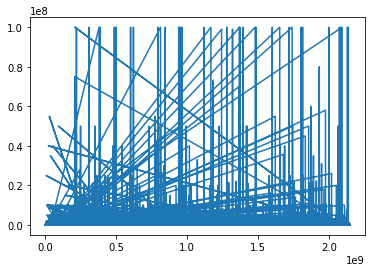

In [18]:
#Now to try some data plotting
pt.plot(data['goal'])
show()

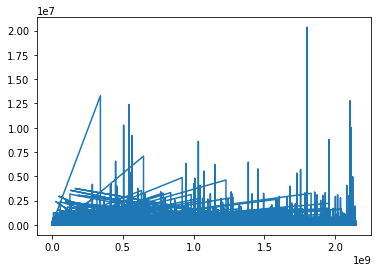

In [19]:
#Now to try some data plotting
pt.plot(data['pledged'])
show()

In [20]:
pt.rc('figure', figsize=(15, 8))

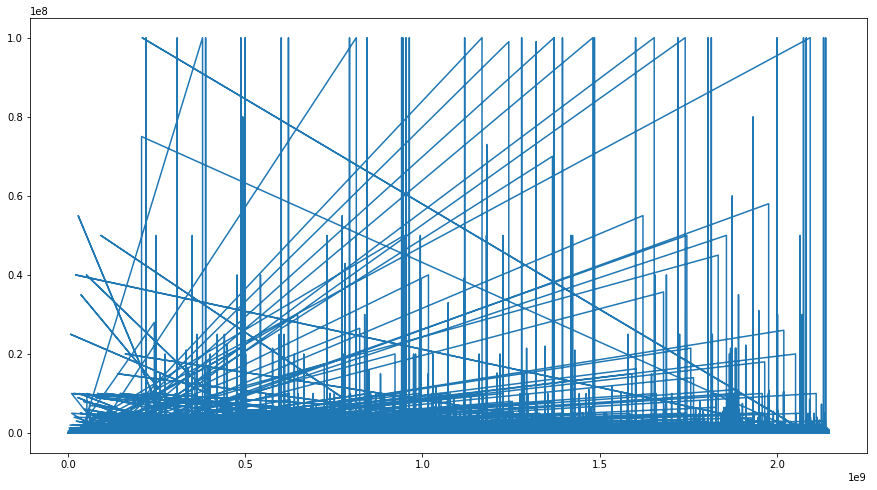

In [21]:
#Now to try some data plotting
pt.plot(data['goal'])
show()
#These plots look quite strange and I need to find out why and revise

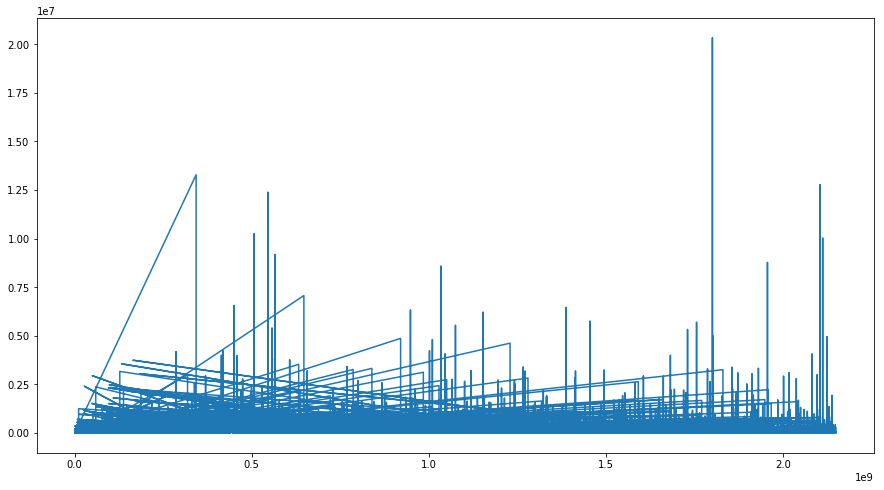

In [22]:
#Now to try some data plotting
pt.plot(data['pledged'])
show()

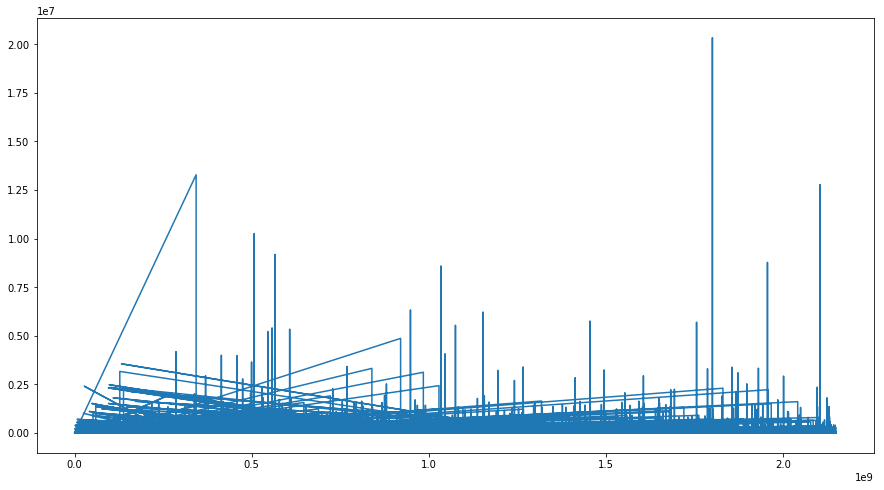

In [23]:
#Now to try some data plotting
pt.plot(data['usd_pledged'])
show()

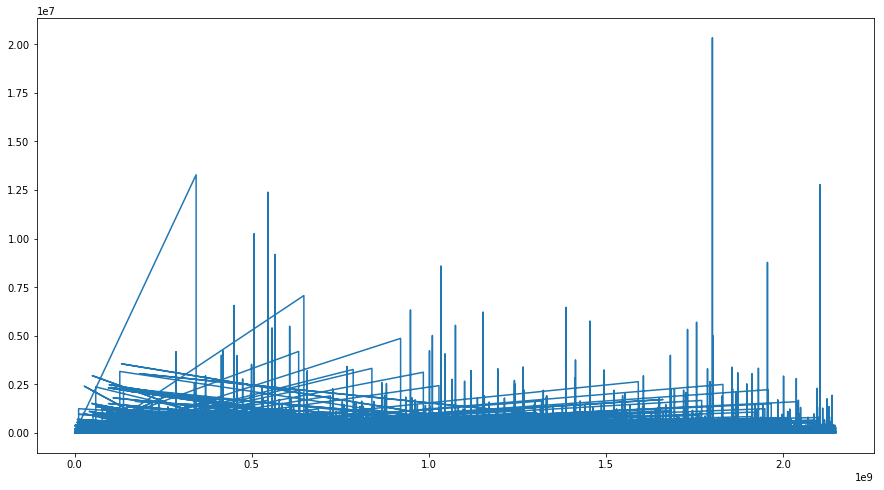

In [24]:
#Now to try some data plotting
pt.plot(data['usd_pledged_real'])
show()

In [25]:
decision_status = datarev['decision_status']
decision_status_count = decision_status.value_counts()
decision_status_count

failed        197719
successful    133956
canceled       38779
undefined       3562
live            2799
suspended       1846
Name: decision_status, dtype: int64

In [26]:
decision_status_per = decision_status_count / len(datarev)

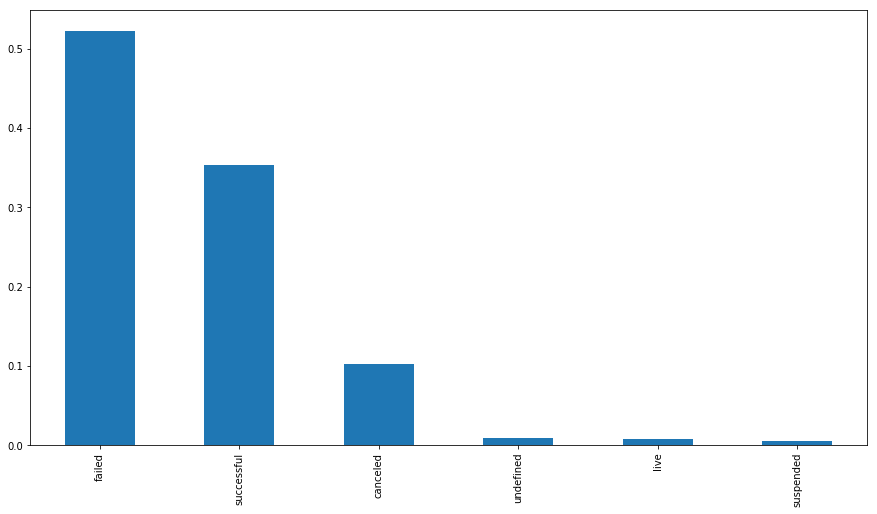

In [27]:
decision_status_per.plot(kind='bar')
show()

#I am now plotting the relative frequency of projects by decision_status e.g. over 50% failed, ~35% succeeded

In [28]:
main_category = datarev['main_category']
main_category_count = main_category.value_counts()
main_category_count

Film & Video    63585
Music           51918
Publishing      39874
Games           35231
Technology      32569
Design          30070
Art             28153
Food            24602
Fashion         22816
Theater         10913
Comics          10819
Photography     10779
Crafts           8809
Journalism       4755
Dance            3768
Name: main_category, dtype: int64

In [29]:
main_category_per = main_category_count / len(datarev)

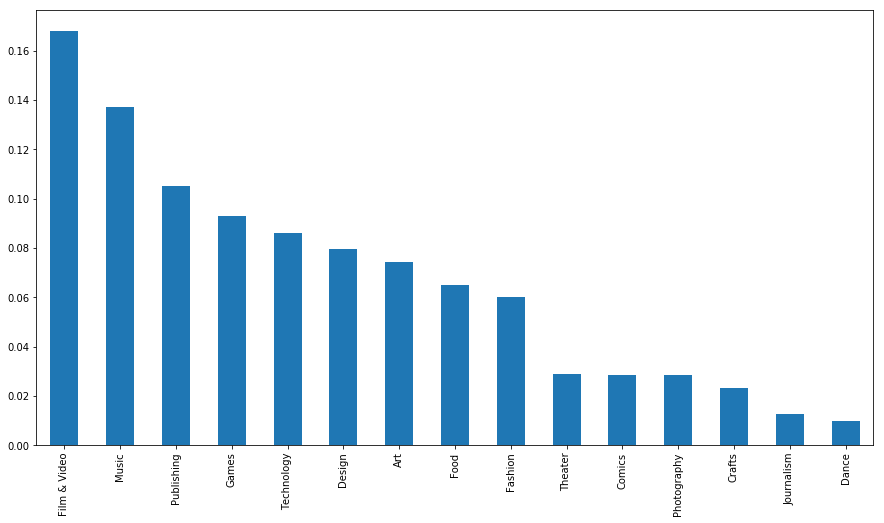

In [30]:
main_category_per.plot(kind='bar')
show()

#I am now plotting the relative frequency of projects by main_category (e.g. 17% are film projects)

In [31]:
successdata = datarev[decision_status=='successful']

In [32]:
main_category = successdata['main_category']
main_category_count = main_category.value_counts()
main_category_count

Music           24197
Film & Video    23623
Games           12518
Publishing      12300
Art             11510
Design          10550
Theater          6534
Technology       6434
Food             6085
Comics           5842
Fashion          5593
Photography      3305
Dance            2338
Crafts           2115
Journalism       1012
Name: main_category, dtype: int64

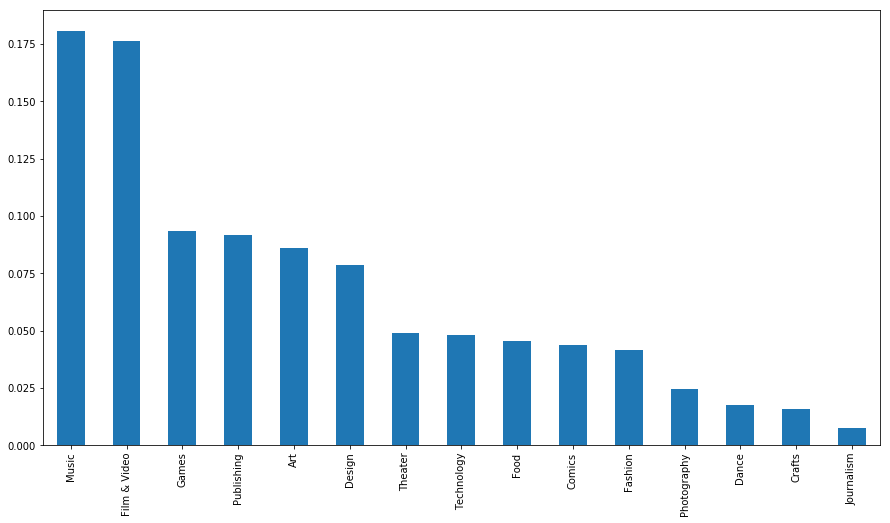

In [33]:
main_category_per = main_category_count / len(successdata)
main_category_per.plot(kind='bar')
show()

In [ ]:
#Comparing the total project data with the subset of successful project data, it's clear that music, art, and theater projects 
#were disproportionally more successful